In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import pyplot as plt
%matplotlib inline

import torch.cuda as cuda
import os

# Local imports
from models import AdversarialNet

In [2]:
# GPU functions
def use_gpu():
    """ The shortcut to retrieve the environment variable 'MY_GPU'"""
    try:
        str_val = os.environ['MY_GPU']
    except:
        set_global_gpu()
        str_val = os.environ['MY_GPU']
    assert str_val in ['True', 'False']
    return str_val == 'True'

def set_global_gpu(manual=None):
    """ Sets the environment variable 'MY_GPU'. Defaults to using gpu
        if cuda is available
    ARGS:
        manual : bool - we set the 'MY_GPU' environment var to the string
                 of whatever this is
    RETURNS
        None
    """
    if manual is None:
        val = cuda.is_available()
    else:
        val = manual
    os.environ['MY_GPU'] = str(val)

# Use GPU
use_gpu()

True

In [3]:
# Training parameters
n_epochs       = 10 # Total number of epochs
adversary_pace = 2  # Once every k epochs
batch_size     = 200

# Dataset parameters
num_classes = 10

In [4]:
# Data preprocessing
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Loader objects
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# TODO: Previous code had 'batch_size = 4' here, was that intentional?
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

# Currently unused
classes = (str(i) for i in range(1, num_classes+1))

In [5]:
# Optimization target
criterion = nn.CrossEntropyLoss()

# Adversarial network
advNet = AdversarialNet()

# Primary optimizer
optimizer_min = optim.SGD(advNet.primary_weights, lr=0.01, momentum=0., nesterov=False)
# Adversary optimizer
# TODO: May need to give this more power (?)
# Doesn't seem to do anything in its round currently
optimizer_max = optim.SGD(advNet.adversary_weights, lr=0.01, momentum=0., nesterov=False)

C:\Users\ma56473\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[Primary, Epoch 1, batch 1] Crossentropy: 2.318
[Primary, Epoch 1, batch 2] Crossentropy: 2.322
[Primary, Epoch 1, batch 3] Crossentropy: 2.272
[Primary, Epoch 1, batch 4] Crossentropy: 2.309
[Primary, Epoch 1, batch 5] Crossentropy: 2.299
[Primary, Epoch 1, batch 6] Crossentropy: 2.268
[Primary, Epoch 1, batch 7] Crossentropy: 2.277
[Primary, Epoch 1, batch 8] Crossentropy: 2.303
[Primary, Epoch 1, batch 9] Crossentropy: 2.271
[Primary, Epoch 1, batch 10] Crossentropy: 2.265
[Primary, Epoch 1, batch 11] Crossentropy: 2.268
[Primary, Epoch 1, batch 12] Crossentropy: 2.269
[Primary, Epoch 1, batch 13] Crossentropy: 2.289
[Primary, Epoch 1, batch 14] Crossentropy: 2.271
[Primary, Epoch 1, batch 15] Crossentropy: 2.274
[Primary, Epoch 1, batch 16] Crossentropy: 2.270
[Primary, Epoch 1, batch 17] Crossentropy: 2.270
[Primary, Epoch 1, batch 18] Crossentropy: 2.270
[Primary, Epoch 1, batch 19] Crossentropy: 2.265
[Primary, Epoch 1, batch 20] Crossentropy: 2.265
[Primary, Epoch 1, batch 21] 

[Primary, Epoch 1, batch 167] Crossentropy: 2.071
[Primary, Epoch 1, batch 168] Crossentropy: 2.059
[Primary, Epoch 1, batch 169] Crossentropy: 2.088
[Primary, Epoch 1, batch 170] Crossentropy: 2.039
[Primary, Epoch 1, batch 171] Crossentropy: 2.054
[Primary, Epoch 1, batch 172] Crossentropy: 2.054
[Primary, Epoch 1, batch 173] Crossentropy: 2.031
[Primary, Epoch 1, batch 174] Crossentropy: 2.048
[Primary, Epoch 1, batch 175] Crossentropy: 2.055
[Primary, Epoch 1, batch 176] Crossentropy: 2.052
[Primary, Epoch 1, batch 177] Crossentropy: 2.087
[Primary, Epoch 1, batch 178] Crossentropy: 2.071
[Primary, Epoch 1, batch 179] Crossentropy: 1.987
[Primary, Epoch 1, batch 180] Crossentropy: 2.043
[Primary, Epoch 1, batch 181] Crossentropy: 2.042
[Primary, Epoch 1, batch 182] Crossentropy: 2.024
[Primary, Epoch 1, batch 183] Crossentropy: 2.087
[Primary, Epoch 1, batch 184] Crossentropy: 2.032
[Primary, Epoch 1, batch 185] Crossentropy: 2.039
[Primary, Epoch 1, batch 186] Crossentropy: 2.025


[Adversary, Epoch 1, batch 30] Crossentropy: 1.892
[Adversary, Epoch 1, batch 31] Crossentropy: 1.881
[Adversary, Epoch 1, batch 32] Crossentropy: 1.917
[Adversary, Epoch 1, batch 33] Crossentropy: 1.906
[Adversary, Epoch 1, batch 34] Crossentropy: 1.928
[Adversary, Epoch 1, batch 35] Crossentropy: 1.909
[Adversary, Epoch 1, batch 36] Crossentropy: 1.905
[Adversary, Epoch 1, batch 37] Crossentropy: 1.872
[Adversary, Epoch 1, batch 38] Crossentropy: 1.866
[Adversary, Epoch 1, batch 39] Crossentropy: 1.940
[Adversary, Epoch 1, batch 40] Crossentropy: 1.909
[Adversary, Epoch 1, batch 41] Crossentropy: 1.889
[Adversary, Epoch 1, batch 42] Crossentropy: 1.857
[Adversary, Epoch 1, batch 43] Crossentropy: 1.902
[Adversary, Epoch 1, batch 44] Crossentropy: 1.914
[Adversary, Epoch 1, batch 45] Crossentropy: 1.895
[Adversary, Epoch 1, batch 46] Crossentropy: 1.905
[Adversary, Epoch 1, batch 47] Crossentropy: 1.902
[Adversary, Epoch 1, batch 48] Crossentropy: 1.949
[Adversary, Epoch 1, batch 49] 

[Adversary, Epoch 1, batch 188] Crossentropy: 1.876
[Adversary, Epoch 1, batch 189] Crossentropy: 1.895
[Adversary, Epoch 1, batch 190] Crossentropy: 1.910
[Adversary, Epoch 1, batch 191] Crossentropy: 1.884
[Adversary, Epoch 1, batch 192] Crossentropy: 1.896
[Adversary, Epoch 1, batch 193] Crossentropy: 1.895
[Adversary, Epoch 1, batch 194] Crossentropy: 1.893
[Adversary, Epoch 1, batch 195] Crossentropy: 1.899
[Adversary, Epoch 1, batch 196] Crossentropy: 1.929
[Adversary, Epoch 1, batch 197] Crossentropy: 1.844
[Adversary, Epoch 1, batch 198] Crossentropy: 1.923
[Adversary, Epoch 1, batch 199] Crossentropy: 1.880
[Adversary, Epoch 1, batch 200] Crossentropy: 1.887
[Adversary, Epoch 1, batch 201] Crossentropy: 1.897
[Adversary, Epoch 1, batch 202] Crossentropy: 1.865
[Adversary, Epoch 1, batch 203] Crossentropy: 1.885
[Adversary, Epoch 1, batch 204] Crossentropy: 1.915
[Adversary, Epoch 1, batch 205] Crossentropy: 1.867
[Adversary, Epoch 1, batch 206] Crossentropy: 1.881
[Adversary, 

[Primary, Epoch 2, batch 48] Crossentropy: 1.853
[Primary, Epoch 2, batch 49] Crossentropy: 1.843
[Primary, Epoch 2, batch 50] Crossentropy: 1.809
[Primary, Epoch 2, batch 51] Crossentropy: 1.847
[Primary, Epoch 2, batch 52] Crossentropy: 1.892
[Primary, Epoch 2, batch 53] Crossentropy: 1.887
[Primary, Epoch 2, batch 54] Crossentropy: 1.848
[Primary, Epoch 2, batch 55] Crossentropy: 1.852
[Primary, Epoch 2, batch 56] Crossentropy: 1.860
[Primary, Epoch 2, batch 57] Crossentropy: 1.843
[Primary, Epoch 2, batch 58] Crossentropy: 1.806
[Primary, Epoch 2, batch 59] Crossentropy: 1.854
[Primary, Epoch 2, batch 60] Crossentropy: 1.838
[Primary, Epoch 2, batch 61] Crossentropy: 1.845
[Primary, Epoch 2, batch 62] Crossentropy: 1.849
[Primary, Epoch 2, batch 63] Crossentropy: 1.848
[Primary, Epoch 2, batch 64] Crossentropy: 1.875
[Primary, Epoch 2, batch 65] Crossentropy: 1.828
[Primary, Epoch 2, batch 66] Crossentropy: 1.855
[Primary, Epoch 2, batch 67] Crossentropy: 1.868
[Primary, Epoch 2, b

[Primary, Epoch 2, batch 212] Crossentropy: 1.777
[Primary, Epoch 2, batch 213] Crossentropy: 1.813
[Primary, Epoch 2, batch 214] Crossentropy: 1.811
[Primary, Epoch 2, batch 215] Crossentropy: 1.840
[Primary, Epoch 2, batch 216] Crossentropy: 1.824
[Primary, Epoch 2, batch 217] Crossentropy: 1.807
[Primary, Epoch 2, batch 218] Crossentropy: 1.775
[Primary, Epoch 2, batch 219] Crossentropy: 1.802
[Primary, Epoch 2, batch 220] Crossentropy: 1.795
[Primary, Epoch 2, batch 221] Crossentropy: 1.786
[Primary, Epoch 2, batch 222] Crossentropy: 1.769
[Primary, Epoch 2, batch 223] Crossentropy: 1.779
[Primary, Epoch 2, batch 224] Crossentropy: 1.789
[Primary, Epoch 2, batch 225] Crossentropy: 1.812
[Primary, Epoch 2, batch 226] Crossentropy: 1.834
[Primary, Epoch 2, batch 227] Crossentropy: 1.818
[Primary, Epoch 2, batch 228] Crossentropy: 1.774
[Primary, Epoch 2, batch 229] Crossentropy: 1.802
[Primary, Epoch 2, batch 230] Crossentropy: 1.805
[Primary, Epoch 2, batch 231] Crossentropy: 1.820


[Primary, Epoch 3, batch 77] Crossentropy: 1.730
[Primary, Epoch 3, batch 78] Crossentropy: 1.768
[Primary, Epoch 3, batch 79] Crossentropy: 1.796
[Primary, Epoch 3, batch 80] Crossentropy: 1.765
[Primary, Epoch 3, batch 81] Crossentropy: 1.720
[Primary, Epoch 3, batch 82] Crossentropy: 1.717
[Primary, Epoch 3, batch 83] Crossentropy: 1.790
[Primary, Epoch 3, batch 84] Crossentropy: 1.771
[Primary, Epoch 3, batch 85] Crossentropy: 1.755
[Primary, Epoch 3, batch 86] Crossentropy: 1.780
[Primary, Epoch 3, batch 87] Crossentropy: 1.804
[Primary, Epoch 3, batch 88] Crossentropy: 1.791
[Primary, Epoch 3, batch 89] Crossentropy: 1.792
[Primary, Epoch 3, batch 90] Crossentropy: 1.750
[Primary, Epoch 3, batch 91] Crossentropy: 1.777
[Primary, Epoch 3, batch 92] Crossentropy: 1.765
[Primary, Epoch 3, batch 93] Crossentropy: 1.731
[Primary, Epoch 3, batch 94] Crossentropy: 1.795
[Primary, Epoch 3, batch 95] Crossentropy: 1.727
[Primary, Epoch 3, batch 96] Crossentropy: 1.785
[Primary, Epoch 3, b

[Primary, Epoch 3, batch 241] Crossentropy: 1.716
[Primary, Epoch 3, batch 242] Crossentropy: 1.811
[Primary, Epoch 3, batch 243] Crossentropy: 1.748
[Primary, Epoch 3, batch 244] Crossentropy: 1.716
[Primary, Epoch 3, batch 245] Crossentropy: 1.728
[Primary, Epoch 3, batch 246] Crossentropy: 1.744
[Primary, Epoch 3, batch 247] Crossentropy: 1.728
[Primary, Epoch 3, batch 248] Crossentropy: 1.728
[Primary, Epoch 3, batch 249] Crossentropy: 1.762
[Primary, Epoch 3, batch 250] Crossentropy: 1.751
[Primary, Epoch 3, batch 251] Crossentropy: 1.729
[Primary, Epoch 3, batch 252] Crossentropy: 1.747
[Primary, Epoch 3, batch 253] Crossentropy: 1.717
[Primary, Epoch 3, batch 254] Crossentropy: 1.761
[Primary, Epoch 3, batch 255] Crossentropy: 1.738
[Primary, Epoch 3, batch 256] Crossentropy: 1.744
[Primary, Epoch 3, batch 257] Crossentropy: 1.750
[Primary, Epoch 3, batch 258] Crossentropy: 1.740
[Primary, Epoch 3, batch 259] Crossentropy: 1.761
[Primary, Epoch 3, batch 260] Crossentropy: 1.701


[Adversary, Epoch 3, batch 102] Crossentropy: 1.737
[Adversary, Epoch 3, batch 103] Crossentropy: 1.716
[Adversary, Epoch 3, batch 104] Crossentropy: 1.750
[Adversary, Epoch 3, batch 105] Crossentropy: 1.740
[Adversary, Epoch 3, batch 106] Crossentropy: 1.738
[Adversary, Epoch 3, batch 107] Crossentropy: 1.710
[Adversary, Epoch 3, batch 108] Crossentropy: 1.738
[Adversary, Epoch 3, batch 109] Crossentropy: 1.759
[Adversary, Epoch 3, batch 110] Crossentropy: 1.741
[Adversary, Epoch 3, batch 111] Crossentropy: 1.752
[Adversary, Epoch 3, batch 112] Crossentropy: 1.722
[Adversary, Epoch 3, batch 113] Crossentropy: 1.720
[Adversary, Epoch 3, batch 114] Crossentropy: 1.771
[Adversary, Epoch 3, batch 115] Crossentropy: 1.703
[Adversary, Epoch 3, batch 116] Crossentropy: 1.786
[Adversary, Epoch 3, batch 117] Crossentropy: 1.720
[Adversary, Epoch 3, batch 118] Crossentropy: 1.749
[Adversary, Epoch 3, batch 119] Crossentropy: 1.732
[Adversary, Epoch 3, batch 120] Crossentropy: 1.739
[Adversary, 

[Adversary, Epoch 3, batch 259] Crossentropy: 1.745
[Adversary, Epoch 3, batch 260] Crossentropy: 1.799
[Adversary, Epoch 3, batch 261] Crossentropy: 1.726
[Adversary, Epoch 3, batch 262] Crossentropy: 1.741
[Adversary, Epoch 3, batch 263] Crossentropy: 1.742
[Adversary, Epoch 3, batch 264] Crossentropy: 1.756
[Adversary, Epoch 3, batch 265] Crossentropy: 1.760
[Adversary, Epoch 3, batch 266] Crossentropy: 1.780
[Adversary, Epoch 3, batch 267] Crossentropy: 1.715
[Adversary, Epoch 3, batch 268] Crossentropy: 1.726
[Adversary, Epoch 3, batch 269] Crossentropy: 1.767
[Adversary, Epoch 3, batch 270] Crossentropy: 1.756
[Adversary, Epoch 3, batch 271] Crossentropy: 1.736
[Adversary, Epoch 3, batch 272] Crossentropy: 1.729
[Adversary, Epoch 3, batch 273] Crossentropy: 1.742
[Adversary, Epoch 3, batch 274] Crossentropy: 1.743
[Adversary, Epoch 3, batch 275] Crossentropy: 1.725
[Adversary, Epoch 3, batch 276] Crossentropy: 1.694
[Adversary, Epoch 3, batch 277] Crossentropy: 1.694
[Adversary, 

[Primary, Epoch 4, batch 123] Crossentropy: 1.698
[Primary, Epoch 4, batch 124] Crossentropy: 1.726
[Primary, Epoch 4, batch 125] Crossentropy: 1.779
[Primary, Epoch 4, batch 126] Crossentropy: 1.731
[Primary, Epoch 4, batch 127] Crossentropy: 1.747
[Primary, Epoch 4, batch 128] Crossentropy: 1.750
[Primary, Epoch 4, batch 129] Crossentropy: 1.777
[Primary, Epoch 4, batch 130] Crossentropy: 1.705
[Primary, Epoch 4, batch 131] Crossentropy: 1.744
[Primary, Epoch 4, batch 132] Crossentropy: 1.712
[Primary, Epoch 4, batch 133] Crossentropy: 1.742
[Primary, Epoch 4, batch 134] Crossentropy: 1.713
[Primary, Epoch 4, batch 135] Crossentropy: 1.718
[Primary, Epoch 4, batch 136] Crossentropy: 1.695
[Primary, Epoch 4, batch 137] Crossentropy: 1.745
[Primary, Epoch 4, batch 138] Crossentropy: 1.707
[Primary, Epoch 4, batch 139] Crossentropy: 1.722
[Primary, Epoch 4, batch 140] Crossentropy: 1.732
[Primary, Epoch 4, batch 141] Crossentropy: 1.714
[Primary, Epoch 4, batch 142] Crossentropy: 1.742


[Primary, Epoch 4, batch 286] Crossentropy: 1.709
[Primary, Epoch 4, batch 287] Crossentropy: 1.674
[Primary, Epoch 4, batch 288] Crossentropy: 1.759
[Primary, Epoch 4, batch 289] Crossentropy: 1.750
[Primary, Epoch 4, batch 290] Crossentropy: 1.749
[Primary, Epoch 4, batch 291] Crossentropy: 1.704
[Primary, Epoch 4, batch 292] Crossentropy: 1.729
[Primary, Epoch 4, batch 293] Crossentropy: 1.740
[Primary, Epoch 4, batch 294] Crossentropy: 1.700
[Primary, Epoch 4, batch 295] Crossentropy: 1.680
[Primary, Epoch 4, batch 296] Crossentropy: 1.712
[Primary, Epoch 4, batch 297] Crossentropy: 1.714
[Primary, Epoch 4, batch 298] Crossentropy: 1.732
[Primary, Epoch 4, batch 299] Crossentropy: 1.705
[Primary, Epoch 4, batch 300] Crossentropy: 1.708
[Primary, Epoch 5, batch 1] Crossentropy: 1.758
[Primary, Epoch 5, batch 2] Crossentropy: 1.705
[Primary, Epoch 5, batch 3] Crossentropy: 1.704
[Primary, Epoch 5, batch 4] Crossentropy: 1.714
[Primary, Epoch 5, batch 5] Crossentropy: 1.734
[Primary, 

[Primary, Epoch 5, batch 152] Crossentropy: 1.701
[Primary, Epoch 5, batch 153] Crossentropy: 1.736
[Primary, Epoch 5, batch 154] Crossentropy: 1.717
[Primary, Epoch 5, batch 155] Crossentropy: 1.692
[Primary, Epoch 5, batch 156] Crossentropy: 1.681
[Primary, Epoch 5, batch 157] Crossentropy: 1.721
[Primary, Epoch 5, batch 158] Crossentropy: 1.703
[Primary, Epoch 5, batch 159] Crossentropy: 1.697
[Primary, Epoch 5, batch 160] Crossentropy: 1.675
[Primary, Epoch 5, batch 161] Crossentropy: 1.747
[Primary, Epoch 5, batch 162] Crossentropy: 1.686
[Primary, Epoch 5, batch 163] Crossentropy: 1.733
[Primary, Epoch 5, batch 164] Crossentropy: 1.709
[Primary, Epoch 5, batch 165] Crossentropy: 1.719
[Primary, Epoch 5, batch 166] Crossentropy: 1.743
[Primary, Epoch 5, batch 167] Crossentropy: 1.713
[Primary, Epoch 5, batch 168] Crossentropy: 1.719
[Primary, Epoch 5, batch 169] Crossentropy: 1.711
[Primary, Epoch 5, batch 170] Crossentropy: 1.716
[Primary, Epoch 5, batch 171] Crossentropy: 1.710


[Adversary, Epoch 5, batch 15] Crossentropy: 1.728
[Adversary, Epoch 5, batch 16] Crossentropy: 1.678
[Adversary, Epoch 5, batch 17] Crossentropy: 1.723
[Adversary, Epoch 5, batch 18] Crossentropy: 1.669
[Adversary, Epoch 5, batch 19] Crossentropy: 1.692
[Adversary, Epoch 5, batch 20] Crossentropy: 1.711
[Adversary, Epoch 5, batch 21] Crossentropy: 1.688
[Adversary, Epoch 5, batch 22] Crossentropy: 1.668
[Adversary, Epoch 5, batch 23] Crossentropy: 1.722
[Adversary, Epoch 5, batch 24] Crossentropy: 1.719
[Adversary, Epoch 5, batch 25] Crossentropy: 1.694
[Adversary, Epoch 5, batch 26] Crossentropy: 1.701
[Adversary, Epoch 5, batch 27] Crossentropy: 1.724
[Adversary, Epoch 5, batch 28] Crossentropy: 1.741
[Adversary, Epoch 5, batch 29] Crossentropy: 1.734
[Adversary, Epoch 5, batch 30] Crossentropy: 1.718
[Adversary, Epoch 5, batch 31] Crossentropy: 1.670
[Adversary, Epoch 5, batch 32] Crossentropy: 1.708
[Adversary, Epoch 5, batch 33] Crossentropy: 1.697
[Adversary, Epoch 5, batch 34] 

[Adversary, Epoch 5, batch 174] Crossentropy: 1.681
[Adversary, Epoch 5, batch 175] Crossentropy: 1.720
[Adversary, Epoch 5, batch 176] Crossentropy: 1.692
[Adversary, Epoch 5, batch 177] Crossentropy: 1.731
[Adversary, Epoch 5, batch 178] Crossentropy: 1.712
[Adversary, Epoch 5, batch 179] Crossentropy: 1.713
[Adversary, Epoch 5, batch 180] Crossentropy: 1.677
[Adversary, Epoch 5, batch 181] Crossentropy: 1.685
[Adversary, Epoch 5, batch 182] Crossentropy: 1.682
[Adversary, Epoch 5, batch 183] Crossentropy: 1.708
[Adversary, Epoch 5, batch 184] Crossentropy: 1.729
[Adversary, Epoch 5, batch 185] Crossentropy: 1.675
[Adversary, Epoch 5, batch 186] Crossentropy: 1.691
[Adversary, Epoch 5, batch 187] Crossentropy: 1.707
[Adversary, Epoch 5, batch 188] Crossentropy: 1.744
[Adversary, Epoch 5, batch 189] Crossentropy: 1.719
[Adversary, Epoch 5, batch 190] Crossentropy: 1.699
[Adversary, Epoch 5, batch 191] Crossentropy: 1.698
[Adversary, Epoch 5, batch 192] Crossentropy: 1.741
[Adversary, 

[Primary, Epoch 6, batch 33] Crossentropy: 1.658
[Primary, Epoch 6, batch 34] Crossentropy: 1.687
[Primary, Epoch 6, batch 35] Crossentropy: 1.683
[Primary, Epoch 6, batch 36] Crossentropy: 1.721
[Primary, Epoch 6, batch 37] Crossentropy: 1.713
[Primary, Epoch 6, batch 38] Crossentropy: 1.689
[Primary, Epoch 6, batch 39] Crossentropy: 1.723
[Primary, Epoch 6, batch 40] Crossentropy: 1.727
[Primary, Epoch 6, batch 41] Crossentropy: 1.727
[Primary, Epoch 6, batch 42] Crossentropy: 1.670
[Primary, Epoch 6, batch 43] Crossentropy: 1.685
[Primary, Epoch 6, batch 44] Crossentropy: 1.712
[Primary, Epoch 6, batch 45] Crossentropy: 1.709
[Primary, Epoch 6, batch 46] Crossentropy: 1.715
[Primary, Epoch 6, batch 47] Crossentropy: 1.712
[Primary, Epoch 6, batch 48] Crossentropy: 1.701
[Primary, Epoch 6, batch 49] Crossentropy: 1.694
[Primary, Epoch 6, batch 50] Crossentropy: 1.665
[Primary, Epoch 6, batch 51] Crossentropy: 1.718
[Primary, Epoch 6, batch 52] Crossentropy: 1.705
[Primary, Epoch 6, b

[Primary, Epoch 6, batch 198] Crossentropy: 1.684
[Primary, Epoch 6, batch 199] Crossentropy: 1.714
[Primary, Epoch 6, batch 200] Crossentropy: 1.716
[Primary, Epoch 6, batch 201] Crossentropy: 1.737
[Primary, Epoch 6, batch 202] Crossentropy: 1.658
[Primary, Epoch 6, batch 203] Crossentropy: 1.717
[Primary, Epoch 6, batch 204] Crossentropy: 1.669
[Primary, Epoch 6, batch 205] Crossentropy: 1.711
[Primary, Epoch 6, batch 206] Crossentropy: 1.705
[Primary, Epoch 6, batch 207] Crossentropy: 1.707
[Primary, Epoch 6, batch 208] Crossentropy: 1.763
[Primary, Epoch 6, batch 209] Crossentropy: 1.687
[Primary, Epoch 6, batch 210] Crossentropy: 1.744
[Primary, Epoch 6, batch 211] Crossentropy: 1.703
[Primary, Epoch 6, batch 212] Crossentropy: 1.732
[Primary, Epoch 6, batch 213] Crossentropy: 1.710
[Primary, Epoch 6, batch 214] Crossentropy: 1.719
[Primary, Epoch 6, batch 215] Crossentropy: 1.699
[Primary, Epoch 6, batch 216] Crossentropy: 1.676
[Primary, Epoch 6, batch 217] Crossentropy: 1.745


[Primary, Epoch 7, batch 63] Crossentropy: 1.671
[Primary, Epoch 7, batch 64] Crossentropy: 1.645
[Primary, Epoch 7, batch 65] Crossentropy: 1.693
[Primary, Epoch 7, batch 66] Crossentropy: 1.720
[Primary, Epoch 7, batch 67] Crossentropy: 1.680
[Primary, Epoch 7, batch 68] Crossentropy: 1.742
[Primary, Epoch 7, batch 69] Crossentropy: 1.677
[Primary, Epoch 7, batch 70] Crossentropy: 1.713
[Primary, Epoch 7, batch 71] Crossentropy: 1.694
[Primary, Epoch 7, batch 72] Crossentropy: 1.656
[Primary, Epoch 7, batch 73] Crossentropy: 1.690
[Primary, Epoch 7, batch 74] Crossentropy: 1.742
[Primary, Epoch 7, batch 75] Crossentropy: 1.683
[Primary, Epoch 7, batch 76] Crossentropy: 1.689
[Primary, Epoch 7, batch 77] Crossentropy: 1.740
[Primary, Epoch 7, batch 78] Crossentropy: 1.703
[Primary, Epoch 7, batch 79] Crossentropy: 1.649
[Primary, Epoch 7, batch 80] Crossentropy: 1.695
[Primary, Epoch 7, batch 81] Crossentropy: 1.716
[Primary, Epoch 7, batch 82] Crossentropy: 1.664
[Primary, Epoch 7, b

[Primary, Epoch 7, batch 227] Crossentropy: 1.639
[Primary, Epoch 7, batch 228] Crossentropy: 1.716
[Primary, Epoch 7, batch 229] Crossentropy: 1.653
[Primary, Epoch 7, batch 230] Crossentropy: 1.688
[Primary, Epoch 7, batch 231] Crossentropy: 1.717
[Primary, Epoch 7, batch 232] Crossentropy: 1.714
[Primary, Epoch 7, batch 233] Crossentropy: 1.692
[Primary, Epoch 7, batch 234] Crossentropy: 1.675
[Primary, Epoch 7, batch 235] Crossentropy: 1.685
[Primary, Epoch 7, batch 236] Crossentropy: 1.686
[Primary, Epoch 7, batch 237] Crossentropy: 1.730
[Primary, Epoch 7, batch 238] Crossentropy: 1.680
[Primary, Epoch 7, batch 239] Crossentropy: 1.669
[Primary, Epoch 7, batch 240] Crossentropy: 1.643
[Primary, Epoch 7, batch 241] Crossentropy: 1.703
[Primary, Epoch 7, batch 242] Crossentropy: 1.701
[Primary, Epoch 7, batch 243] Crossentropy: 1.694
[Primary, Epoch 7, batch 244] Crossentropy: 1.662
[Primary, Epoch 7, batch 245] Crossentropy: 1.656
[Primary, Epoch 7, batch 246] Crossentropy: 1.740


[Adversary, Epoch 7, batch 89] Crossentropy: 1.701
[Adversary, Epoch 7, batch 90] Crossentropy: 1.707
[Adversary, Epoch 7, batch 91] Crossentropy: 1.704
[Adversary, Epoch 7, batch 92] Crossentropy: 1.685
[Adversary, Epoch 7, batch 93] Crossentropy: 1.706
[Adversary, Epoch 7, batch 94] Crossentropy: 1.724
[Adversary, Epoch 7, batch 95] Crossentropy: 1.700
[Adversary, Epoch 7, batch 96] Crossentropy: 1.736
[Adversary, Epoch 7, batch 97] Crossentropy: 1.693
[Adversary, Epoch 7, batch 98] Crossentropy: 1.677
[Adversary, Epoch 7, batch 99] Crossentropy: 1.709
[Adversary, Epoch 7, batch 100] Crossentropy: 1.695
[Adversary, Epoch 7, batch 101] Crossentropy: 1.711
[Adversary, Epoch 7, batch 102] Crossentropy: 1.672
[Adversary, Epoch 7, batch 103] Crossentropy: 1.677
[Adversary, Epoch 7, batch 104] Crossentropy: 1.657
[Adversary, Epoch 7, batch 105] Crossentropy: 1.690
[Adversary, Epoch 7, batch 106] Crossentropy: 1.713
[Adversary, Epoch 7, batch 107] Crossentropy: 1.632
[Adversary, Epoch 7, ba

[Adversary, Epoch 7, batch 246] Crossentropy: 1.621
[Adversary, Epoch 7, batch 247] Crossentropy: 1.666
[Adversary, Epoch 7, batch 248] Crossentropy: 1.711
[Adversary, Epoch 7, batch 249] Crossentropy: 1.673
[Adversary, Epoch 7, batch 250] Crossentropy: 1.701
[Adversary, Epoch 7, batch 251] Crossentropy: 1.719
[Adversary, Epoch 7, batch 252] Crossentropy: 1.707
[Adversary, Epoch 7, batch 253] Crossentropy: 1.674
[Adversary, Epoch 7, batch 254] Crossentropy: 1.716
[Adversary, Epoch 7, batch 255] Crossentropy: 1.740
[Adversary, Epoch 7, batch 256] Crossentropy: 1.721
[Adversary, Epoch 7, batch 257] Crossentropy: 1.681
[Adversary, Epoch 7, batch 258] Crossentropy: 1.717
[Adversary, Epoch 7, batch 259] Crossentropy: 1.696
[Adversary, Epoch 7, batch 260] Crossentropy: 1.731
[Adversary, Epoch 7, batch 261] Crossentropy: 1.720
[Adversary, Epoch 7, batch 262] Crossentropy: 1.673
[Adversary, Epoch 7, batch 263] Crossentropy: 1.697
[Adversary, Epoch 7, batch 264] Crossentropy: 1.663
[Adversary, 

[Primary, Epoch 8, batch 109] Crossentropy: 1.672
[Primary, Epoch 8, batch 110] Crossentropy: 1.722
[Primary, Epoch 8, batch 111] Crossentropy: 1.679
[Primary, Epoch 8, batch 112] Crossentropy: 1.677
[Primary, Epoch 8, batch 113] Crossentropy: 1.725
[Primary, Epoch 8, batch 114] Crossentropy: 1.688
[Primary, Epoch 8, batch 115] Crossentropy: 1.685
[Primary, Epoch 8, batch 116] Crossentropy: 1.705
[Primary, Epoch 8, batch 117] Crossentropy: 1.675
[Primary, Epoch 8, batch 118] Crossentropy: 1.709
[Primary, Epoch 8, batch 119] Crossentropy: 1.701
[Primary, Epoch 8, batch 120] Crossentropy: 1.695
[Primary, Epoch 8, batch 121] Crossentropy: 1.709
[Primary, Epoch 8, batch 122] Crossentropy: 1.703
[Primary, Epoch 8, batch 123] Crossentropy: 1.670
[Primary, Epoch 8, batch 124] Crossentropy: 1.717
[Primary, Epoch 8, batch 125] Crossentropy: 1.705
[Primary, Epoch 8, batch 126] Crossentropy: 1.660
[Primary, Epoch 8, batch 127] Crossentropy: 1.695
[Primary, Epoch 8, batch 128] Crossentropy: 1.663


[Primary, Epoch 8, batch 272] Crossentropy: 1.690
[Primary, Epoch 8, batch 273] Crossentropy: 1.703
[Primary, Epoch 8, batch 274] Crossentropy: 1.687
[Primary, Epoch 8, batch 275] Crossentropy: 1.696
[Primary, Epoch 8, batch 276] Crossentropy: 1.737
[Primary, Epoch 8, batch 277] Crossentropy: 1.687
[Primary, Epoch 8, batch 278] Crossentropy: 1.676
[Primary, Epoch 8, batch 279] Crossentropy: 1.690
[Primary, Epoch 8, batch 280] Crossentropy: 1.702
[Primary, Epoch 8, batch 281] Crossentropy: 1.726
[Primary, Epoch 8, batch 282] Crossentropy: 1.693
[Primary, Epoch 8, batch 283] Crossentropy: 1.708
[Primary, Epoch 8, batch 284] Crossentropy: 1.724
[Primary, Epoch 8, batch 285] Crossentropy: 1.691
[Primary, Epoch 8, batch 286] Crossentropy: 1.720
[Primary, Epoch 8, batch 287] Crossentropy: 1.678
[Primary, Epoch 8, batch 288] Crossentropy: 1.688
[Primary, Epoch 8, batch 289] Crossentropy: 1.708
[Primary, Epoch 8, batch 290] Crossentropy: 1.738
[Primary, Epoch 8, batch 291] Crossentropy: 1.671


[Primary, Epoch 9, batch 138] Crossentropy: 1.689
[Primary, Epoch 9, batch 139] Crossentropy: 1.664
[Primary, Epoch 9, batch 140] Crossentropy: 1.667
[Primary, Epoch 9, batch 141] Crossentropy: 1.679
[Primary, Epoch 9, batch 142] Crossentropy: 1.687
[Primary, Epoch 9, batch 143] Crossentropy: 1.709
[Primary, Epoch 9, batch 144] Crossentropy: 1.711
[Primary, Epoch 9, batch 145] Crossentropy: 1.684
[Primary, Epoch 9, batch 146] Crossentropy: 1.677
[Primary, Epoch 9, batch 147] Crossentropy: 1.745
[Primary, Epoch 9, batch 148] Crossentropy: 1.699
[Primary, Epoch 9, batch 149] Crossentropy: 1.751
[Primary, Epoch 9, batch 150] Crossentropy: 1.686
[Primary, Epoch 9, batch 151] Crossentropy: 1.699
[Primary, Epoch 9, batch 152] Crossentropy: 1.702
[Primary, Epoch 9, batch 153] Crossentropy: 1.696
[Primary, Epoch 9, batch 154] Crossentropy: 1.684
[Primary, Epoch 9, batch 155] Crossentropy: 1.644
[Primary, Epoch 9, batch 156] Crossentropy: 1.671
[Primary, Epoch 9, batch 157] Crossentropy: 1.665


[Adversary, Epoch 9, batch 1] Crossentropy: 1.650
[Adversary, Epoch 9, batch 2] Crossentropy: 1.666
[Adversary, Epoch 9, batch 3] Crossentropy: 1.694
[Adversary, Epoch 9, batch 4] Crossentropy: 1.662
[Adversary, Epoch 9, batch 5] Crossentropy: 1.664
[Adversary, Epoch 9, batch 6] Crossentropy: 1.636
[Adversary, Epoch 9, batch 7] Crossentropy: 1.666
[Adversary, Epoch 9, batch 8] Crossentropy: 1.647
[Adversary, Epoch 9, batch 9] Crossentropy: 1.705
[Adversary, Epoch 9, batch 10] Crossentropy: 1.656
[Adversary, Epoch 9, batch 11] Crossentropy: 1.651
[Adversary, Epoch 9, batch 12] Crossentropy: 1.685
[Adversary, Epoch 9, batch 13] Crossentropy: 1.682
[Adversary, Epoch 9, batch 14] Crossentropy: 1.677
[Adversary, Epoch 9, batch 15] Crossentropy: 1.655
[Adversary, Epoch 9, batch 16] Crossentropy: 1.701
[Adversary, Epoch 9, batch 17] Crossentropy: 1.680
[Adversary, Epoch 9, batch 18] Crossentropy: 1.668
[Adversary, Epoch 9, batch 19] Crossentropy: 1.690
[Adversary, Epoch 9, batch 20] Crossentr

[Adversary, Epoch 9, batch 160] Crossentropy: 1.691
[Adversary, Epoch 9, batch 161] Crossentropy: 1.673
[Adversary, Epoch 9, batch 162] Crossentropy: 1.684
[Adversary, Epoch 9, batch 163] Crossentropy: 1.700
[Adversary, Epoch 9, batch 164] Crossentropy: 1.704
[Adversary, Epoch 9, batch 165] Crossentropy: 1.665
[Adversary, Epoch 9, batch 166] Crossentropy: 1.700
[Adversary, Epoch 9, batch 167] Crossentropy: 1.680
[Adversary, Epoch 9, batch 168] Crossentropy: 1.695
[Adversary, Epoch 9, batch 169] Crossentropy: 1.651
[Adversary, Epoch 9, batch 170] Crossentropy: 1.675
[Adversary, Epoch 9, batch 171] Crossentropy: 1.675
[Adversary, Epoch 9, batch 172] Crossentropy: 1.679
[Adversary, Epoch 9, batch 173] Crossentropy: 1.704
[Adversary, Epoch 9, batch 174] Crossentropy: 1.695
[Adversary, Epoch 9, batch 175] Crossentropy: 1.669
[Adversary, Epoch 9, batch 176] Crossentropy: 1.622
[Adversary, Epoch 9, batch 177] Crossentropy: 1.705
[Adversary, Epoch 9, batch 178] Crossentropy: 1.675
[Adversary, 

[Primary, Epoch 10, batch 18] Crossentropy: 1.691
[Primary, Epoch 10, batch 19] Crossentropy: 1.675
[Primary, Epoch 10, batch 20] Crossentropy: 1.667
[Primary, Epoch 10, batch 21] Crossentropy: 1.685
[Primary, Epoch 10, batch 22] Crossentropy: 1.682
[Primary, Epoch 10, batch 23] Crossentropy: 1.666
[Primary, Epoch 10, batch 24] Crossentropy: 1.653
[Primary, Epoch 10, batch 25] Crossentropy: 1.666
[Primary, Epoch 10, batch 26] Crossentropy: 1.674
[Primary, Epoch 10, batch 27] Crossentropy: 1.733
[Primary, Epoch 10, batch 28] Crossentropy: 1.670
[Primary, Epoch 10, batch 29] Crossentropy: 1.686
[Primary, Epoch 10, batch 30] Crossentropy: 1.692
[Primary, Epoch 10, batch 31] Crossentropy: 1.657
[Primary, Epoch 10, batch 32] Crossentropy: 1.691
[Primary, Epoch 10, batch 33] Crossentropy: 1.678
[Primary, Epoch 10, batch 34] Crossentropy: 1.698
[Primary, Epoch 10, batch 35] Crossentropy: 1.698
[Primary, Epoch 10, batch 36] Crossentropy: 1.671
[Primary, Epoch 10, batch 37] Crossentropy: 1.650


[Primary, Epoch 10, batch 180] Crossentropy: 1.641
[Primary, Epoch 10, batch 181] Crossentropy: 1.680
[Primary, Epoch 10, batch 182] Crossentropy: 1.690
[Primary, Epoch 10, batch 183] Crossentropy: 1.681
[Primary, Epoch 10, batch 184] Crossentropy: 1.673
[Primary, Epoch 10, batch 185] Crossentropy: 1.711
[Primary, Epoch 10, batch 186] Crossentropy: 1.682
[Primary, Epoch 10, batch 187] Crossentropy: 1.697
[Primary, Epoch 10, batch 188] Crossentropy: 1.641
[Primary, Epoch 10, batch 189] Crossentropy: 1.678
[Primary, Epoch 10, batch 190] Crossentropy: 1.697
[Primary, Epoch 10, batch 191] Crossentropy: 1.681
[Primary, Epoch 10, batch 192] Crossentropy: 1.679
[Primary, Epoch 10, batch 193] Crossentropy: 1.713
[Primary, Epoch 10, batch 194] Crossentropy: 1.690
[Primary, Epoch 10, batch 195] Crossentropy: 1.643
[Primary, Epoch 10, batch 196] Crossentropy: 1.665
[Primary, Epoch 10, batch 197] Crossentropy: 1.679
[Primary, Epoch 10, batch 198] Crossentropy: 1.695
[Primary, Epoch 10, batch 199] 

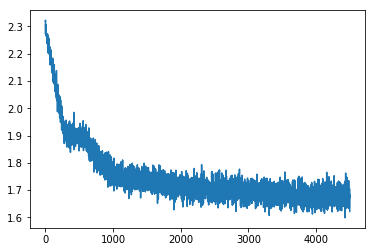

In [6]:
# Optimization history logging
history = []

# Epochs
for epoch in range(n_epochs):
    # Averaged loss
    running_loss = 0.
    
    # Primary optimization
    for i, data in enumerate(trainloader, 0):
        # Get data
        inputs, labels = data
        
        # Zero gradients
        optimizer_min.zero_grad()
                
        # Forward pass
        outputs = advNet(inputs)
        loss    = criterion(outputs, labels)
        # Backpropagate
        loss.backward()
        # Cancel out gradients for the adversary
        # TODO: Is this really needed if the optimizer only works with a subset of weights?
        # Yes, otherwise gradient will accumulate?
        # But we're gonna zero it when it's the adversary's turn anyways?
        optimizer_max.zero_grad()
        # Descend
        optimizer_min.step()
        
        # Print statistics before adversary turn
        # TODO: This currently spams the console, it's fine
        print('[Primary, Epoch %d, batch %d] Crossentropy: %.3f' %
              (epoch+1, i+1, loss.item()))
        # Save history
        # TODO: Save separate histories for primary, adversary, epoch, etc.
        history.append(loss.item())
        
    # Adversary optimization - once every adversary_pace epochs
    if epoch % adversary_pace == 0:
        # Adversary optimization
        for i, data in enumerate(trainloader, 0):
            # Get data
            inputs, labels = data
            
            # Zero gradients
            optimizer_max.zero_grad()
                    
            # Forward pass
            outputs = advNet(inputs)
            loss    = -criterion(outputs, labels)
            # Backpropagate
            loss.backward()
            # Cancel out gradients for the primary
            # TODO: Same question as before
            optimizer_min.zero_grad()
            # Descend
            optimizer_max.step()
            
            # Print statistics
            print('[Adversary, Epoch %d, batch %d] Crossentropy: %.3f' %
                  (epoch+1, i+1, -loss.item()))
            # Save history
            history.append(-loss.item())           

In [ ]:
# Plot raw global history
plt.figure(); plt.plot(history)